In [73]:
import pandas as pd
import datetime as dt

import numpy as np

In [74]:
df = pd.read_csv('coffee_consumption.csv')

In [75]:
df.date = pd.to_datetime(df.date)

In [76]:
df = df.set_index('date')

In [77]:
df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563


In [78]:
numbers = pd.DataFrame([1,2,3,4,5,6,7,8])
numbers.ewm(span=3,adjust=False).mean()

,0
0,1.000000
1,1.500000
2,2.250000
3,3.125000
4,4.062500
5,5.031250
6,6.015625
7,7.007812


In [79]:
import numpy as np
from vega_datasets import data
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = data.sf_temps()
df.date = pd.to_datetime(df.date)

In [81]:
df = df.set_index('date')

In [82]:
df.head(2)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4


In [83]:
#1
avg_per_day = df.resample('D').aggregate(np.mean)
min_per_day = df.resample('D').aggregate(np.min)
max_per_day = df.resample('D').aggregate(np.max)


NameError: name 'stats_per_day' is not defined

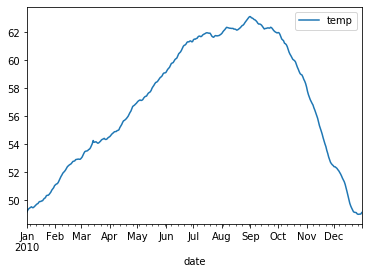

In [85]:
#average temperature by day.
avg_per_day.plot(y='temp')

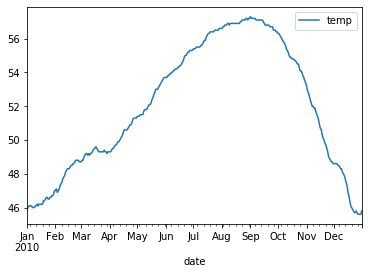

In [86]:
min_per_day.plot(y='temp')

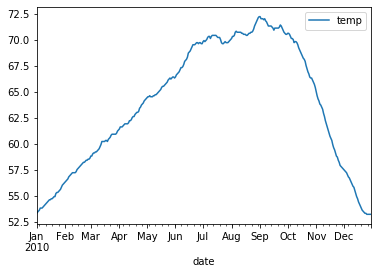

In [87]:
max_per_day.plot(y='temp')

In [ ]:
#4 and 5: Which month is coldest on average? Jan. Which month is hottest? Sept.
avg_per_mon = df.resample('M').aggregate(np.mean)
avg_per_mon.plot(y='temp')

In [ ]:
min_max_day = df.resample('D').aggregate([min,max])

In [ ]:
min_max_day['temp_diff'] = min_max_day.temp['max'] - min_max_day.temp['min']

In [ ]:
min_max_day.dtypes

In [ ]:
max_temp_diff = min_max_day.resample('M').agg(max)

In [ ]:
#6 largest temperature variability by month

max_temp_diff.plot(y='temp_diff')


In [ ]:
stats_per_day = df.resample('D').agg(['min','max','mean'])
stats_per_day.head(2)

In [ ]:
plt.plot(y=stats_per_day.temp['min'])

In [ ]:
ax =min_per_day.plot()
max_per_day.plot(ax=ax)
avg_per_day.plot(ax=ax)

In [ ]:
min_per_day.plot()
max_per_day.plot()


In [ ]:
stats_per_day.temp.plot()

In [3]:
from vega_datasets import data

In [4]:
df = data.seattle_weather()

In [5]:
df = df.set_index('date')

In [6]:
monthly = df.resample('M').agg(sum)

In [7]:
#montly precipitation over time
monthly.precipitation.plot()

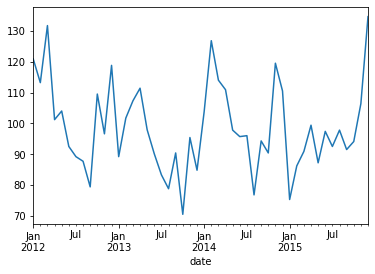

In [8]:
monthly.wind.plot()
#

In [9]:
#windiest month
monthly[monthly.wind == monthly.wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


In [10]:
df['sunny'] = df.weather == 'sun'

In [12]:
yearly = df.resample('Y').agg(sum)

In [20]:
yearly[yearly.sunny == yearly.sunny.max()]

,precipitation,temp_max,temp_min,wind,sunny
date,,,,,
2014-12-31,1232.8,6203.5,3161.8,1236.5,211.0


In [37]:
df['no_rain'] = df.precipitation == 0

In [41]:
daily = df.resample('D').agg(sum)

In [44]:
monthly_rain = daily.resample('M').agg(sum)

In [48]:
monthly_rain[monthly_rain.no_rain == monthly_rain.no_rain.max()]

,precipitation,temp_max,temp_min,wind,sunny,no_rain
date,,,,,,
2012-08-31,0.0,801.6,434.3,87.7,24.0,31.0
2013-07-31,0.0,808.9,431.9,83.3,27.0,31.0


In [58]:
df = data.flights_20k()

In [59]:
df.head()

,date,delay,destination,distance,origin
0,2001-01-13 14:56:00,32,SJC,417,SAN
1,2001-01-31 16:40:00,-5,ISP,1093,FLL
2,2001-02-11 18:39:00,3,DAL,293,LBB
3,2001-01-10 21:00:00,-15,MCO,550,MSY
4,2001-03-30 21:45:00,-2,IND,229,STL


In [56]:
df['delay'] = np.where(df['delay'] < 0,0,df['delay'])

In [68]:
df = df.set_index('date')

In [70]:
df['hours'] = df.index.hour

In [72]:
df.groupby(by='hours').agg(sum)

,delay,distance
hours,,
0,1535,5095
1,170,256
3,605,644
5,-179,12125
6,-998,436344
7,-1590,751794
8,-105,751231
9,946,674564
10,2520,592866


In [88]:
iowa = data.iowa_electricity()

In [89]:
iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [90]:
df = data.sf_temps